 # Delunay memory test

In [3]:
### Package Import
import sys
import os
base_dir = os.environ['GEMS_HOME']
project_path = os.path.join(base_dir, 'python-refactor')
sys.path.insert(0, project_path)
from Code.utils import matlab

import glob
import numpy as np
import rasterio as rio
from scipy.interpolate import griddata
import time

### Setting path
data_base_dir = os.path.join('/data2', 'sehyun', 'Data')
path_grid_raw = os.path.join(data_base_dir, 'Raw', 'grid')
path_myd_processed = os.path.join(data_base_dir, 'Preprocessed_raw', 'MODIS', 'MYD13A2') # Read
path_ea_goci = os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km')
path_ea_goci_ndivi = os.path.join(path_ea_goci, 'MODIS_NDVI')

mat = matlab.loadmat(os.path.join(path_grid_raw, 'grid_goci.mat')) # lon_goci, lat_goci
lon_goci = mat['lon_goci']
lat_goci = mat['lat_goci']
del mat

mat = matlab.loadmat(os.path.join(path_grid_raw, 'grid_GCS_MODIS_1km_EA.mat'))
points = np.array([mat['lon_gcs_1km'].ravel(order='F'), mat['lat_gcs_1km'].ravel(order='F')]).T
del mat

In [4]:
YEARS = [2016]
for yr in YEARS:
    flist = glob.glob(os.path.join(path_myd_processed, '03mask', str(yr), "*.tif"))
    flist.sort()
    for fname in flist:
        tStart = time.time()
        print (os.path.basename(fname))
        with rio.open(fname) as src:
            ndvi = src.read(1)
        ndvi = np.float64(ndvi)
        ndvi[ndvi<=-32767] = np.nan
        ndvi = np.divide(ndvi, 10000)
        ndvi[np.abs(ndvi)>=0.99] = np.nan
        values = ndvi.ravel(order='F')
        break
        ndivi = griddata(points=points, 
                         values=values, 
                         xi=(lon_goci, lat_goci),
                         method='linear')
        matlab.savemat(os.path.join(path_ea_goci_ndivi, str(yr), f'EA_MODIS_NDVI_{os.path.basename(fname)[10:-4]}.mat'), 
                       {'ndvi':ndivi})
        del ndvi
        print (f'EA_MODIS_NDVI_{os.path.basename(fname)[10:-4]}.mat')
        tElapsed = time.time() - tStart
        print (f'time taken : {tElapsed}')
    print (yr)
    break

m_MYD13A2_2016_009.tif
2016


In [9]:
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator

In [6]:
import time

In [7]:
even_idx = list(range(0, 11470963, 2))

In [8]:
odd_idx = list(range(1, 11470963, 2))

In [13]:
tStart =time.time()

tri = Delaunay(points[:10000,:], incremental=True)

tElapsed = time.time()-tStart
print (f'time taken : {tElapsed:.4f}')

time taken : 0.6918


In [26]:
import gc

In [27]:
gc.collect()

2679

In [ ]:
tStart =time.time()

tri.add_points(points[:10000000, :], restart=True)

tElapsed = time.time()-tStart
print (f'time taken : {tElapsed:.4f}')

In [ ]:
unit = 1000000
for i in range(int(points.shape[0]/unit)):
    tStart =time.time()
    if i==0:
        tri = Delaunay(points[i*unit:(i+1)*unit], incremental=True)
    else:
        tri.add_points(points[i*unit:(i+1)*unit])
    tElapsed = time.time()-tStart
    print (f'{i}th time taken : {tElapsed:.4f}')

# data 01

In [1]:
### Package Import
import sys
import os
base_dir = os.environ['GEMS_HOME']
project_path = os.path.join(base_dir, 'python-refactor')
sys.path.insert(0, project_path)
from Code.utils import matlab

import glob
import numpy as np
import rasterio as rio
from scipy.interpolate import griddata

### Setting path
data_base_dir = os.path.join(project_path, 'Data')
path_read = os.path.join(data_base_dir, 'Preprocessed_raw', 'MODIS', 'MYD13A2', '03mask') 
path_write = os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km', 'MODIS_NDVI')

In [36]:
src = rio.open(os.path.join(data_base_dir, 'Preprocessed_raw', 'MODIS', 'MYD13A2', '03mask', '2016', 'm_MYD13A2_2016_025.tif'))

In [32]:
ndvi = src.read(1)

In [34]:
ndvi/10000

array([[-0.9999,  0.2153,  0.2225, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999,  0.0809,  0.0809, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999,  0.0978,  0.0777, ..., -0.9999, -0.9999, -0.9999],
       ...,
       [-0.9999, -0.9999, -0.9999, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999, -0.9999, -0.9999, ..., -0.9999, -0.9999, -0.9999],
       [-0.9999, -0.9999, -0.9999, ..., -0.9999, -0.9999, -0.9999]])

In [80]:
mat = matlab.loadmat(os.path.join(path_write, '2016', 'EA_MODIS_NDVI_2016_009.mat'))
mat2 = matlab.loadmat('EA_MODIS_NDVI_2016_009.mat')

print (mat['ndvi'].shape)
print (mat2['ndvi'].shape)

print (np.all(mat['ndvi']==mat2['ndvi']))
print (np.all(np.isclose(mat['ndvi'], mat2['ndvi'])))
print (mat['ndvi']==mat2['ndvi'])

(473, 463)
(473, 463)
False
False
[[False False False ... False False False]
 [ True False  True ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [98]:
from rasterio.plot import show

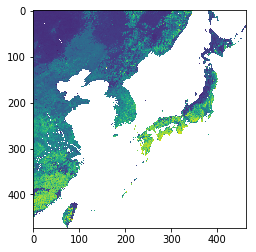

In [99]:
show(mat['ndvi'])

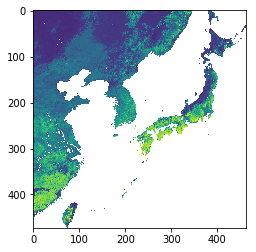

In [100]:
show(mat2['ndvi'])

# data 02

In [7]:
### Package Import
import sys
import os
base_dir = os.environ['GEMS_HOME']
project_path = os.path.join(base_dir, 'python-refactor')
sys.path.insert(0, project_path)
from Code.utils import matlab

import netCDF4
import numpy as np
import glob
from scipy.interpolate import griddata
import time

### Setting path
data_base_dir = os.path.join('/data2', 'sehyun', 'Data')
path_grid_raw = os.path.join(data_base_dir, 'Raw', 'grid')
path_bess_raw = os.path.join(data_base_dir, 'Raw', 'BESS') # Read
path_ea_goci = os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km') 
path_ea_goci_bess = os.path.join(path_ea_goci, 'Preprocessed_raw', 'EA_GOCI6km', 'BESS') # Write

mat = matlab.loadmat(os.path.join(path_grid_raw, 'grid_bess.mat')) # lon_bess, lat_bess
points = np.array([mat['lon_bess'].ravel(order='F'), mat['lat_bess'].ravel(order='F')]).T
del mat
print (f'points shape : {points.shape}')


points shape : (25920000, 2)


In [126]:
mat = matlab.loadmat(os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km', 'BESS', '2016', 'EA6km_BESS_RSDN_2016_001.mat'))
mat2 = matlab.loadmat('EA6km_BESS_RSDN_2016_001.mat')
arr = mat['RSDN']
arr2 = mat2['RSDN']

print (arr.shape)
print (arr2.shape)

print (np.nanmax(np.abs(arr-arr2)))

print (np.all(arr==arr2))
print (np.all(np.isclose(arr, arr2)))
print (arr==arr2)

(473, 463)
(473, 463)
25.474121137085504
False
False
[[False False False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [128]:
np.where(~np.isclose(arr, arr2, equal_nan=True))

(array([  0,   0,   0, ..., 471, 472, 472]),
 array([ 5,  8, 20, ..., 74, 73, 76]))

In [129]:
arr[0, 5]

72.12692260806314

In [130]:
arr2[0, 5]

72.1649627692019

In [114]:
np.all(np.isclose(arr, arr2, equal_nan=True))

False

In [127]:
np.isclose(arr, arr2, equal_nan=True)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [138]:
np.nanargmax(np.abs(arr-arr2))

111428

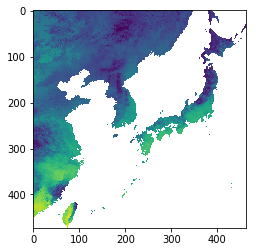

In [131]:
show(arr)

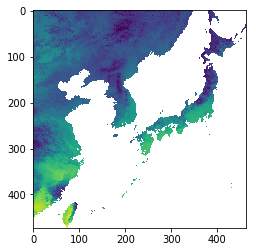

In [132]:
show(arr2)

# data 03

In [142]:
### Package Import
import sys
import os
base_dir = os.environ['GEMS_HOME']
project_path = os.path.join(base_dir, 'python-refactor')
sys.path.insert(0, project_path)
from Code.utils import matlab

import glob
import numpy as np
from scipy.interpolate import griddata
import time

### Setting path
data_base_dir = os.path.join('/data2', 'sehyun', 'Data')
path_grid_raw = os.path.join(data_base_dir, 'Raw', 'grid')
path_gpm_processed = os.path.join(data_base_dir, 'Preprocessed_raw', 'GPM', 'AP_24h_hourly') # read
path_ea_goci = os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km') 
path_ea_goci_gpm = os.path.join(path_ea_goci, 'Preprocessed_raw', 'EA_GOCI6km', 'GPM_AP') # Write

mat = matlab.loadmat(os.path.join(path_grid_raw, 'grid_goci.mat'))
lat_goci, lon_goci = mat['lat_goci'], mat['lon_goci']
del mat

mat = matlab.loadmat(os.path.join(path_grid_raw, 'grid_gpm.mat'))
lat_gpm, lon_gpm = mat['lat_gpm'], mat['lon_gpm']
del mat
lat_gpm = lat_gpm[1100:1400, 2900:3300] # N50 W110 S20 E150
lon_gpm = lon_gpm[1100:1400, 2900:3300] 
points = np.array([lon_gpm.ravel(order='F'), lat_gpm.ravel(order='F')]).T
#del lon_gpm, lat_gpm
print (f'points shape : {points.shape}')


points shape : (120000, 2)


In [2]:
YEARS = [2016]
for yr in YEARS:
    flist = glob.glob(os.path.join(path_gpm_processed, str(yr), '*.mat'))
    flist.sort()
    for fname in flist:
        tStart = time.time()
        precip = matlab.loadmat(fname)['precip']
        precip = precip[1100:1400, 2900:3300]
        values = precip.ravel(order='F')
        precip = griddata(points=points, 
                          values=values,
                          xi=(lon_goci, lat_goci),
                          method='linear')
        matlab.savemat(os.path.join(path_ea_goci_gpm, str(yr), f'EA6km_{os.path.basename(fname)}'), 
                      {'precip':precip})
        del precip
        print (os.path.basename(fname))
        tElapsed = time.time() - tStart
        print (f'time taken : {tElapsed}')
        break
    break
    print (yr)

gpm_AP_2016_002_UTC00.mat
time taken : 2.4743449687957764


In [3]:
precip = griddata(points=points, 
                          values=values,
                          xi=(lon_goci, lat_goci),
                          method='linear')

In [4]:
from scipy import ndimage

In [11]:
data = np.array([lon_goci.ravel(order='F'), lat_goci.ravel(order='F')]).T

In [60]:
data.shape

(218999, 2)

In [61]:
points.shape

(120000, 2)

In [62]:
values.shape

(120000,)

In [117]:
points2 = np.concatenate([values.reshape(-1, 1), points], axis=1)

In [118]:
points2.shape

(120000, 3)

In [123]:
points2

array([[  0.        , 110.05000305,  20.04999924],
       [  0.        , 110.05000305,  20.14999962],
       [  0.        , 110.05000305,  20.25      ],
       ...,
       [  0.        , 149.94999695,  49.75      ],
       [  0.        , 149.94999695,  49.84999847],
       [  0.        , 149.94999695,  49.95000076]])

In [139]:
import scipy

In [140]:
points

array([[110.05000305,  20.04999924],
       [110.05000305,  20.14999962],
       [110.05000305,  20.25      ],
       ...,
       [149.94999695,  49.75      ],
       [149.94999695,  49.84999847],
       [149.94999695,  49.95000076]])

In [144]:
scipy.ndimage.zoom(lat_gpm, 0.43).shape

(129, 172)

In [145]:
scipy.ndimage.zoom(lon_gpm, 0.43).shape

(129, 172)

In [146]:
points2 = np.array([scipy.ndimage.zoom(lon_gpm, 0.43).ravel(order='F'), scipy.ndimage.zoom(lat_gpm, 0.43).ravel(order='F')]).T

In [150]:
precip = matlab.loadmat(fname)['precip']
precip = precip[1100:1400, 2900:3300]
values = precip.ravel(order='F')

In [151]:
precip.shape

(300, 400)

In [152]:
values = scipy.ndimage.zoom(precip, 0.43).ravel(order='F')

In [155]:
arr3 = griddata(points2, values, (lon_goci, lat_goci))

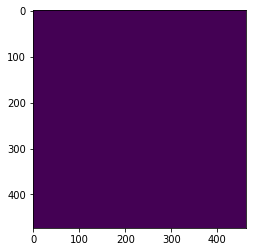

In [156]:
show(arr)

In [134]:
arr = ndimage.map_coordinates(points2, (lon_goci, lat_goci), order=1)

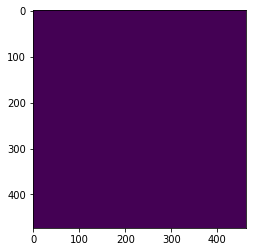

In [137]:
show(arr)

In [115]:
arr2 = griddata(points, values, (lon_goci, lat_goci))

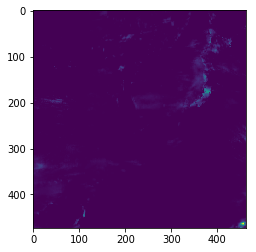

In [116]:
show(arr2)

In [52]:
in_data = np.array([[0., -1., 2.],
                    [2., 1., 0.],
                    [4., 3., 2.]])

In [53]:
in_data.shape

(3, 3)

In [56]:
np.array([[0., 0.]]).T.shape

(2, 1)

In [55]:
ndimage.map_coordinates(in_data, np.array([[0., 0.]]).T, order=1)

array([0.])

In [48]:
data2 = np.concatenate([points, values.reshape(-1, 1)], axis=1)

In [57]:
points.shape

(120000, 2)

In [59]:
ndimage.map_coordinates(data2.T, points.T, order=1)

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
ndimage.map_coordinates(points, data.T, order=1).reshape(473, 463)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
data.shape

(218999, 2)

In [26]:
data.shape

(218999, 2)

In [27]:
points.shape

(120000, 2)

In [28]:
lon_goci.shape

(473, 463)

In [ ]:
(473, 463)

In [18]:
from rasterio.plot import show

In [22]:
arr.shape

(1800, 3600)

In [19]:
mat = matlab.loadmat(os.path.join('/home/cogito/GEMS_python/python-refactor/Data/Preprocessed_raw/GPM/AP_24h_hourly/2016/'
                                  +'gpm_AP_2016_002_UTC01.mat'))
mat2 = matlab.loadmat('gpm_AP_2016_002_UTC01.mat')
arr = mat['precip']
arr2 = mat2['precip']

print (arr.shape)
print (arr2.shape)

print (np.nanmax(np.abs(arr-arr2)))

print (np.all(arr==arr2))
print (np.all(np.isclose(arr, arr2)))
print (arr==arr2)

(1800, 3600)
(1800, 3600)
0.0
True
True
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


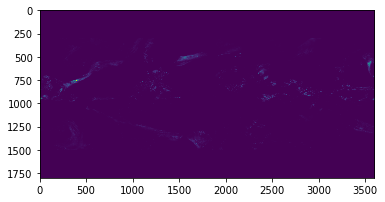

In [24]:
show(arr)

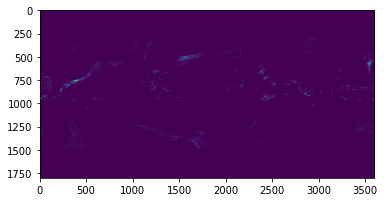

In [25]:
show(arr2)

In [13]:
mat = matlab.loadmat(os.path.join('/home/cogito/GEMS_python/python-refactor/Data/Preprocessed_raw/GPM/AP_24h_hourly/2016/gpm_AP_2016_002_UTC01.mat'))
mat2 = matlab.loadmat('gpm_AP_2016_002_UTC01.mat')
arr = mat['precip']
arr2 = mat2['precip']

print (arr.shape)
print (arr2.shape)

print (np.nanmax(np.abs(arr-arr2)))

print (np.all(arr==arr2))
print (np.all(np.isclose(arr, arr2, equal_nan=True)))
print (arr==arr2)

(1800, 3600)
(1800, 3600)
45.548646688461304
False
False
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [14]:
np.where(arr!=arr2)

(array([ 300,  300,  300, ..., 1499, 1499, 1499]),
 array([ 485,  486,  487, ..., 2681, 2682, 2683]))

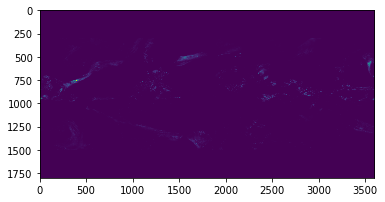

In [15]:
show(arr)

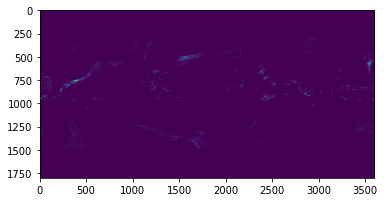

In [16]:
show(arr2)

In [51]:
mat = matlab.loadmat(os.path.join('/home/cogito/GEMS_python/python-refactor/Data/Preprocessed_raw/EA_GOCI6km/GPM_AP/2016/EA6km_gpm_AP_2016_002_UTC03.mat'))
mat2 = matlab.loadmat('EA6km_gpm_AP_2016_002_UTC03.mat')
arr = mat['precip']
arr2 = mat2['precip']

print (arr.shape)
print (arr2.shape)

print (np.nanmax(np.abs(arr-arr2)))

print (np.all(arr==arr2))
print (np.all(np.isclose(arr, arr2, equal_nan=True)))
print (arr==arr2)

(473, 463)
(473, 463)
4.052609112628684
False
False
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True False False]
 [ True  True False ... False False False]
 [ True False  True ...  True False False]]


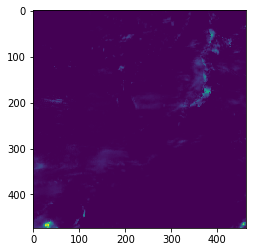

In [52]:
show(arr)

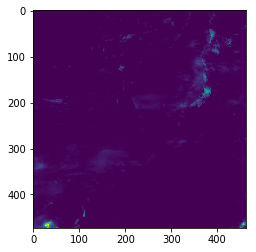

In [53]:
show(arr2)

In [54]:
np.unique(arr)

array([0.00000000e+00, 7.62892901e-06, 7.62951106e-06, ...,
       2.32555165e+01, 2.37801258e+01, 2.40434391e+01])

In [55]:
np.unique(arr2)

array([0.00000000e+00, 7.62892901e-06, 1.05274652e-05, ...,
       2.32555165e+01, 2.37734119e+01, 2.38502599e+01])

In [56]:
np.isclose(arr, arr2, equal_nan=True)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True, False, ...,  True, False, False],
       [ True, False,  True, ...,  True,  True, False]])

In [57]:
arr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.04964626, 3.07976153, 3.01295265, ..., 1.05295837, 0.99333102,
        0.88319834],
       [2.93898614, 3.04041747, 3.06300526, ..., 1.1406252 , 1.05919282,
        0.84278992],
       [2.87495116, 2.96829455, 3.02628529, ..., 1.29620472, 1.12712874,
        0.84448595]])

In [58]:
arr2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.04964626, 3.07976153, 3.01295265, ..., 1.05295837, 0.96806401,
        0.82923965],
       [2.93898614, 3.04041747, 3.07042114, ..., 1.1406252 , 1.04971769,
        0.76274453],
       [2.87495116, 2.88425519, 3.02628529, ..., 1.29620472, 1.12712874,
        0.93047653]])

# data 04

# data 05

In [85]:
mat = matlab.loadmat(os.path.join('/home/cogito/GEMS_python/python-refactor/Data/Preprocessed_raw/'
                                  ,'EA_GOCI6km/RDAPS/Temp_max/2016/EA6km_Tmax_2016_001_00.mat'))
mat2 = matlab.loadmat('EA6km_Tmax_2016_001_00.mat')
arr = mat['Tmax']
arr2 = mat2['Tmax']

print (arr.shape)
print (arr2.shape)

print (np.nanmax(np.abs(arr-arr2)))

print (np.all(arr==arr2))
print (np.all(np.isclose(arr, arr2, equal_nan=True, atol=0.0001)))
print (arr==arr2)

(473, 463)
(473, 463)
1.5258789176186838e-05
False
True
[[False  True False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# data 06

In [95]:
mat = matlab.loadmat(os.path.join('/home/cogito/GEMS_python/python-refactor/Data/Preprocessed_raw/'
                                  ,'EA_GOCI6km/EMIS/2016/EA6km_EMIS_2016_001_05.mat'))
mat2 = matlab.loadmat('EA6km_EMIS_2016_001_05.mat')
arr = mat['EA_emis']
arr2 = mat2['EA_emis']

print (arr.shape)
print (arr2.shape)

print (np.nanmax(np.abs(arr-arr2)))

print (np.all(arr==arr2))
print (np.all(np.isclose(arr, arr2, equal_nan=True, atol=0.0001)))
print (arr==arr2)

(473, 463, 14)
(473, 463, 14)
146.2767579677574
False
False
[[[ True False  True ...  True  True  True]
  [False  True  True ... False  True  True]
  [ True  True False ...  True False False]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[ True  True False ...  True False  True]
  [ True  True  True ...  True  True  True]
  [False  True False ... False  True False]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[False False False ...  True  True False]
  [ True  True  True ...  True  True  True]
  [ True  True False ... False False  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False

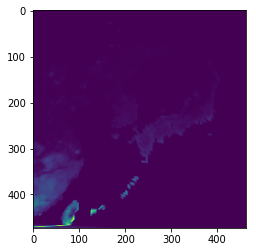

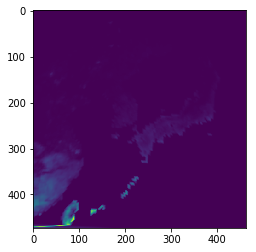

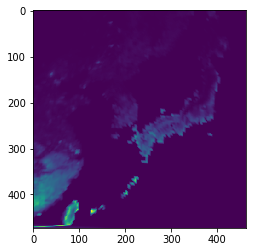

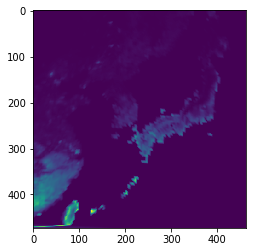

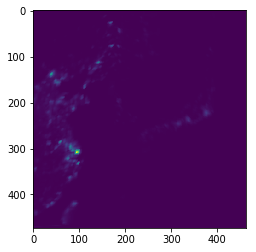

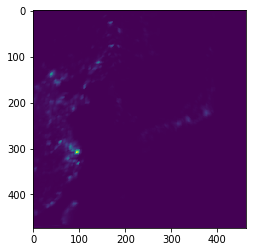

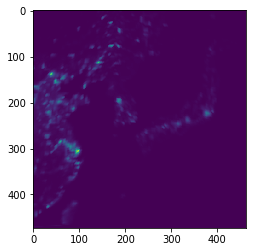

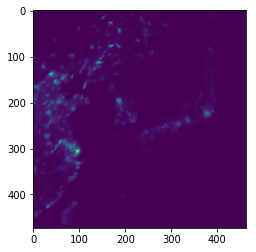

In [108]:
show(arr[:,:,0])
show(arr2[:,:,0])

show(arr[:,:,1])
show(arr2[:,:,1])

show(arr[:,:,2])
show(arr2[:,:,2])

show(arr[:,:,3])
show(arr2[:,:,3])

# data 07

In [1]:
### Package Import
import sys
import os
base_dir = os.environ['GEMS_HOME']
project_path = os.path.join(base_dir, 'python-refactor')
sys.path.insert(0, project_path)
from Code.utils import matlab

import numpy as np
import rasterio as rio
from scipy.interpolate import griddata

### Setting path
data_base_dir = os.path.join(project_path, 'Data')
path_read = os.path.join(data_base_dir, 'Preprocessed_raw', 'MODIS', 'MCD12Q1', '03_LC_ratio') 
path_write = os.path.join(data_base_dir, 'Preprocessed_raw', 'EA_GOCI6km', 'MODIS_LC_ratio')

mat = matlab.loadmat(os.path.join(data_base_dir, 'grid', 'grid_goci.mat')) # lon_goci, lat_goci
lon_goci = mat['lon_goci']
lat_goci = mat['lat_goci']
del mat

mat = matlab.loadmat(os.path.join(data_base_dir,'grid','grid_GCS_MODIS_500m_EA.mat'))
points = np.array([mat['lon_gcs_500m'].ravel(order='F'), mat['lat_gcs_500m'].ravel(order='F')]).T
#del mat

In [2]:
lon_gcs_500m, lat_gcs_500m = mat['lon_gcs_500m'], mat['lat_gcs_500m']

del mat

In [3]:
class_name = ['barren','crop','forest','grass','savannas','shrub','snow','urban','water','wetland']
YEARS = [2016]
for yr in YEARS: 
    for col in class_name:
        with rio.open(os.path.join(path_read, str(yr), f'EA_{col}_ratio_r6_500m_{yr}.tif')) as src: # src.nodata = None
            LC_ratio = src.read(1) 
        LC_ratio = np.float64(LC_ratio) 
        LC_ratio[LC_ratio<0] = np.nan #% nodata value -3.40282346639e+038
        values = LC_ratio.ravel(order='F')
        break
        LC_ratio = griddata(points2, value, (lon_goci,lat_goci), method='linear')
        matlab.savemat(os.path.join(path_write, f'EA6km_{col}_ratio_r6_{yr}.mat'), {f'LC_{col}':LC_ratio})
        print (f'EA6km_{col}_ratio_r6_{yr}')
        del LC_ratio
        
    break

In [4]:
from rasterio.plot import show

In [5]:
mat2 = matlab.loadmat(f'EA6km_{col}_ratio_r6_{yr}.mat')

In [6]:
arr2 = mat2['LC_barren']

In [7]:
arr2.shape

(473, 463)

In [8]:
arr2[arr2!=0]

array([0.11151778, 0.10052909, 0.00347807, ..., 0.20098147, 0.00389004,
       0.04009158])

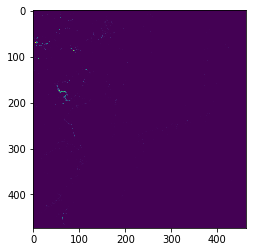

In [62]:
show(arr2)

In [10]:
from shapely.geometry import MultiPoint
from shapely.ops import triangulate
from pprint import pprint

from scipy.interpolate import LinearNDInterpolator
from scipy.spatial import Delaunay
import time

from scipy.ndimage import zoom
from scipy.ndimage import map_coordinates

import gc
gc.collect()

0

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
lon_gcs_500m.shape

(5865, 7820)

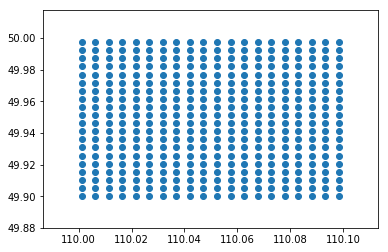

In [49]:
plt.scatter(lon_gcs_500m[:20,:20], lat_gcs_500m[:20,:20])

In [113]:
print (np.min(lon_gcs_500m), np.max(lon_gcs_500m))
print (np.min(lat_gcs_500m), np.max(lat_gcs_500m))

110.00114803292337 149.99863507737456
20.00060585659087 49.99744228435168


111.37054443359375 148.55789184570312
21.614147186279297 48.20196533203125


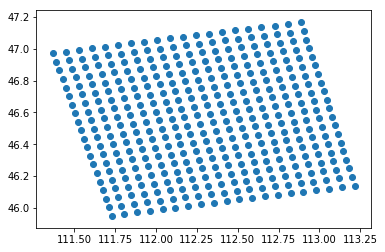

In [114]:
#plt.scatter(lon_gcs_500m[:20,:20], lat_gcs_500m[:20,:20])
plt.scatter(lon_goci[:20,:20], lat_goci[:20,:20])

print (np.min(lon_goci), np.max(lon_goci))
print (np.min(lat_goci), np.max(lat_goci))

In [152]:
X = lon_gcs_500m[0]

In [157]:
Y = lat_gcs_500m[:, 0]

In [193]:
((X-np.min(X))/dx)[7810]

7810.003527307285

In [201]:
((Y-np.min(Y))/dy)[-5860-1]

5860.002646609565

In [222]:
((lon_gcs_500m-np.min(X))/dx).T

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000045e+00, 1.00000045e+00, 1.00000045e+00, ...,
        1.00000045e+00, 1.00000045e+00, 1.00000045e+00],
       [2.00000090e+00, 2.00000090e+00, 2.00000090e+00, ...,
        2.00000090e+00, 2.00000090e+00, 2.00000090e+00],
       ...,
       [7.81700353e+03, 7.81700353e+03, 7.81700353e+03, ...,
        7.81700353e+03, 7.81700353e+03, 7.81700353e+03],
       [7.81800353e+03, 7.81800353e+03, 7.81800353e+03, ...,
        7.81800353e+03, 7.81800353e+03, 7.81800353e+03],
       [7.81900353e+03, 7.81900353e+03, 7.81900353e+03, ...,
        7.81900353e+03, 7.81900353e+03, 7.81900353e+03]])

In [220]:
((lat_gcs_500m[::-1]-np.min(Y))/dy).T

array([[0.00000000e+00, 1.00000045e+00, 2.00000090e+00, ...,
        5.86200265e+03, 5.86300265e+03, 5.86400265e+03],
       [0.00000000e+00, 1.00000045e+00, 2.00000090e+00, ...,
        5.86200265e+03, 5.86300265e+03, 5.86400265e+03],
       [0.00000000e+00, 1.00000045e+00, 2.00000090e+00, ...,
        5.86200265e+03, 5.86300265e+03, 5.86400265e+03],
       ...,
       [0.00000000e+00, 1.00000045e+00, 2.00000090e+00, ...,
        5.86200265e+03, 5.86300265e+03, 5.86400265e+03],
       [0.00000000e+00, 1.00000045e+00, 2.00000090e+00, ...,
        5.86200265e+03, 5.86300265e+03, 5.86400265e+03],
       [0.00000000e+00, 1.00000045e+00, 2.00000090e+00, ...,
        5.86200265e+03, 5.86300265e+03, 5.86400265e+03]])

In [223]:
LC_ratio[::-1].T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
(lon_goci-np.min(X))/dx

array([[ 267.69970025,  283.26149235,  298.8247759 , ..., 7506.2179281 ,
        7521.7886689 , 7537.3564268 ],
       [ 271.48201813,  287.02740428,  302.57577333, ..., 7502.47737083,
        7518.03319712, 7533.58604052],
       [ 275.25091296,  290.7813846 ,  306.31483915, ..., 7498.74576226,
        7514.28965695, 7529.82758585],
       ...,
       [1256.47902735, 1268.01390372, 1279.5487801 , ..., 6528.94513982,
        6540.4740504 , 6552.00296097],
       [1257.51856819, 1269.05046166, 1280.58086368, ..., 6527.91902204,
        6539.44494971, 6550.97087738],
       [1258.55661757, 1270.08254525, 1281.60847292, ..., 6526.89588715,
        6538.41883193, 6549.9387938 ]])

In [228]:
(lat_goci-np.min(Y))/dy

array([[5272.26489967, 5274.34099845, 5276.40814852, ..., 5278.29557883,
        5276.23663174, 5274.16799022],
       [5261.77403849, 5263.84790008, 5265.91281298, ..., 5267.79800612,
        5265.7412962 , 5263.67563758],
       [5251.28541447, 5253.35629317, 5255.41896889, ..., 5257.30117913,
        5255.24745211, 5253.18403067],
       ...,
       [ 337.06267354,  338.59588441,  340.1220109 , ...,  341.51502545,
         339.99523763,  338.46836541],
       [ 326.24630333,  327.77914134,  329.30526783, ...,  330.69790952,
         329.17812169,  327.65162234],
       [ 315.42695022,  316.95941537,  318.48554186, ...,  319.87818354,
         318.35839572,  316.83226923]])

In [269]:
lat_gcs_500m[::-1].T

array([[20.00060586, 20.00572128, 20.0108367 , ..., 49.98721144,
        49.99232686, 49.99744228],
       [20.00060586, 20.00572128, 20.0108367 , ..., 49.98721144,
        49.99232686, 49.99744228],
       [20.00060586, 20.00572128, 20.0108367 , ..., 49.98721144,
        49.99232686, 49.99744228],
       ...,
       [20.00060586, 20.00572128, 20.0108367 , ..., 49.98721144,
        49.99232686, 49.99744228],
       [20.00060586, 20.00572128, 20.0108367 , ..., 49.98721144,
        49.99232686, 49.99744228],
       [20.00060586, 20.00572128, 20.0108367 , ..., 49.98721144,
        49.99232686, 49.99744228]])

In [270]:
LC_ratio[::-1].T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [273]:
arr = map_coordinates(LC_ratio[::-1].T, ((lon_goci-np.min(X))/dx, (lat_goci-np.min(Y))/dy), order=1)

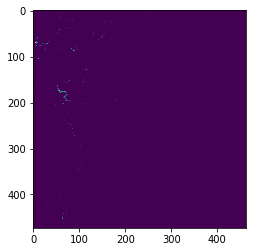

In [274]:
show(arr)

In [253]:
np.isclose(arr, arr2, rtol=0.01)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [35]:
xscale = np.max(lon_goci) - np.min(lon_goci)
yscale = np.max(lat_goci) - np.min(lat_goci)

scale = np.array([xscale, yscale])

In [41]:
lon_goci

array([[111.37054443, 111.45014954, 111.52976227, ..., 148.39860535,
        148.47825623, 148.55789185],
       [111.38989258, 111.46941376, 111.5489502 , ..., 148.37947083,
        148.45904541, 148.53860474],
       [111.40917206, 111.48861694, 111.56807709, ..., 148.36038208,
        148.43989563, 148.51937866],
       ...,
       [116.42856598, 116.48757172, 116.54657745, ..., 143.39944458,
        143.4584198 , 143.51739502],
       [116.43388367, 116.49287415, 116.55185699, ..., 143.39419556,
        143.45315552, 143.51211548],
       [116.43919373, 116.49815369, 116.55711365, ..., 143.38896179,
        143.44790649, 143.50683594]])

In [40]:
lon_gcs_500m

array([[110.00114803, 110.00626346, 110.01137888, ..., 149.98840423,
        149.99351966, 149.99863508],
       [110.00114803, 110.00626346, 110.01137888, ..., 149.98840423,
        149.99351966, 149.99863508],
       [110.00114803, 110.00626346, 110.01137888, ..., 149.98840423,
        149.99351966, 149.99863508],
       ...,
       [110.00114803, 110.00626346, 110.01137888, ..., 149.98840423,
        149.99351966, 149.99863508],
       [110.00114803, 110.00626346, 110.01137888, ..., 149.98840423,
        149.99351966, 149.99863508],
       [110.00114803, 110.00626346, 110.01137888, ..., 149.98840423,
        149.99351966, 149.99863508]])

In [56]:
xscale = np.max(lon_gcs_500m) - np.min(lon_gcs_500m)
yscale = np.max(lat_gcs_500m) - np.min(lat_gcs_500m)

scale = np.array([xscale, yscale])

In [63]:
arr = map_coordinates(LC_ratio, (lon_goci/xscale, lat_goci/yscale), cval=0)

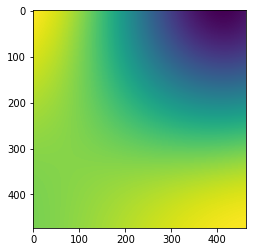

In [65]:
show(arr)

In [68]:
from scipy import interpolate

In [87]:
np.diff(lon_gcs_500m.flatten())

array([0.00511542, 0.00511542, 0.00511542, ..., 0.00511542, 0.00511542,
       0.00511542])

In [89]:
np.diff(lat_gcs_500m.flatten())

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
lon_goci/dx

array([[21503.83507765, 21504.8350781 , 21505.83507856, ...,
        29320.83860812, 29321.83860857, 29322.83860902],
       [21503.83507765, 21504.8350781 , 21505.83507856, ...,
        29320.83860812, 29321.83860857, 29322.83860902],
       [21503.83507765, 21504.8350781 , 21505.83507856, ...,
        29320.83860812, 29321.83860857, 29322.83860902],
       ...,
       [21503.83507765, 21504.8350781 , 21505.83507856, ...,
        29320.83860812, 29321.83860857, 29322.83860902],
       [21503.83507765, 21504.8350781 , 21505.83507856, ...,
        29320.83860812, 29321.83860857, 29322.83860902],
       [21503.83507765, 21504.8350781 , 21505.83507856, ...,
        29320.83860812, 29321.83860857, 29322.83860902]])

In [181]:
dx = 0.00511542
dy = 0.00511542
scaling = np.array([dx, dy])

In [97]:
coords = (lon_goci, lat_goci)

In [106]:
idx = (lon_goci/dx, lat_goci/dy)

In [108]:
new_data = map_coordinates(LC_ratio, idx)

In [15]:
def interp_weights(tri, uv, d=2):
    simplex = tri.find_simplex(uv)
    vertices = np.take(tri.simplices, simplex, axis=0)
    temp = np.take(tri.transform, simplex, axis=0)
    delta = uv - temp[:, d]
    bary = np.einsum('njk,nk->nj', temp[:, :d, :], delta)
    return vertices, np.hstack((bary, 1 - bary.sum(axis=1, keepdims=True)))
def interpolate(values, vtx, wts):
    return np.einsum('nj,nj->n', np.take(values, vtx), wts)

In [16]:
coords = np.array([lon_goci.ravel(order='F'), lat_goci.ravel(order='F')]).T

In [18]:
vtx, wts = interp_weights(tri, coords)

In [21]:
valuesi=interpolate(values.ravel(order='F'), vtx, wts)

11